In [ ]:

import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt 
import numpy as np


In [2]:
import keras

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 652s 4us/step


In [5]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [6]:
print(X_train[0].shape)

(32, 32, 3)


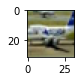

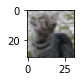

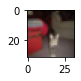

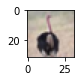

In [13]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [16]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test=X_test/255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 168s 427ms/step - loss: 1.6382 - accuracy: 0.3954 - val_loss: 1.2965 - val_accuracy: 0.5547
Epoch 2/10
391/391 [==============================] - 195s 499ms/step - loss: 1.1586 - accuracy: 0.5893 - val_loss: 0.9495 - val_accuracy: 0.6622
Epoch 3/10
391/391 [==============================] - 183s 467ms/step - loss: 0.9623 - accuracy: 0.6614 - val_loss: 0.8786 - val_accuracy: 0.6887
Epoch 4/10
391/391 [==============================] - 192s 491ms/step - loss: 0.8443 - accuracy: 0.7034 - val_loss: 0.7695 - val_accuracy: 0.7322
Epoch 5/10
391/391 [==============================] - 185s 473ms/step - loss: 0.7596 - accuracy: 0.7358 - val_loss: 0.7943 - val_accuracy: 0.7287
Epoch 6/10
391/391 [==============================] - 161s 412ms/step - loss: 0.6898 - accuracy: 0.7586 - val_loss: 0.7160 - val_accuracy: 0.7535
Epoch 7/10
391/391 [==============================] - 178s 454ms/step - loss: 0.6339 - accuracy: 0.7779 - val_loss: 0.7186 -

In [18]:
classes = range(0,10)
names = ['airplane',
       'automobile',
         'bird',
        'cat',
     'deer',
         'frog',
       'horse',
      'ship',
         'truck']

class_labels = dict(zip(classes, names))
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 158ms/step


In [19]:
print (predictions)

[[3.7175982e-04 4.7599140e-05 2.3979601e-02 2.4422184e-02 4.7697115e-01
  1.7982845e-01 1.8369489e-03 2.9212028e-01 2.5069102e-04 1.7132708e-04]
 [2.4726609e-04 2.9639561e-05 4.9861740e-02 1.1900419e-01 4.0915128e-02
  6.4425939e-01 8.1616575e-03 1.3711198e-01 1.8234240e-04 2.2660375e-04]
 [6.6909037e-05 2.4622149e-04 9.4554864e-02 5.8215711e-02 1.3324838e-03
  8.1339039e-02 7.5843620e-01 3.6587368e-03 2.0380344e-03 1.1173313e-04]
 [6.1721962e-06 3.8207736e-06 1.6298307e-03 8.2704699e-01 3.0714532e-02
  3.2899138e-02 1.0757019e-01 1.1293734e-04 4.5840716e-06 1.1687765e-05]
 [4.6395307e-06 9.9784768e-01 2.2129001e-09 9.0139873e-10 5.4807780e-11
  4.4261771e-11 4.6264888e-11 3.6144446e-10 3.9839000e-05 2.1078663e-03]
 [1.1249584e-06 9.9953556e-01 3.5432461e-09 8.3046823e-09 1.7144692e-11
  1.0990264e-10 1.0859584e-08 1.9248435e-12 2.0575941e-04 2.5751858e-04]
 [3.1266939e-02 3.8503942e-05 3.0807137e-01 4.0529314e-01 2.0842934e-03
  1.6320108e-01 8.0039918e-02 8.5725999e-03 1.3902985e-03 

In [20]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
0.99999994
1.0
0.99999994
0.99999994
0.99999994
1.0


In [21]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


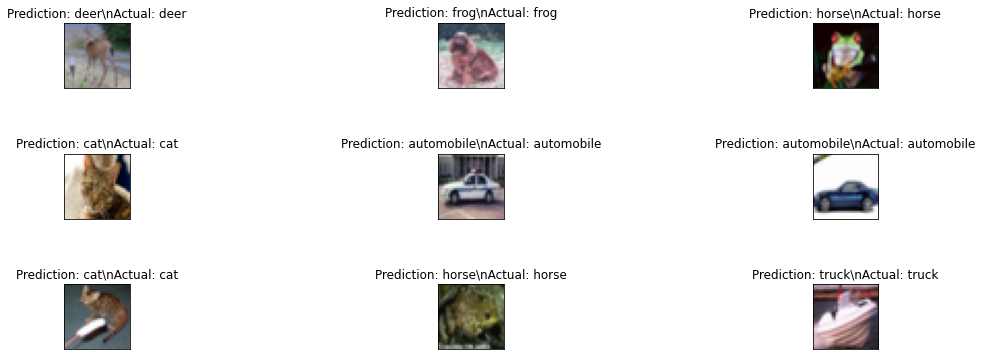

In [22]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()


for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
            
            axs[i].imshow(img)
plt.show()           